## Perth Basin Case Study using Loop2Flopy

In [1]:
import numpy as np
import pandas as pd
import numbers

### Importing Borehole Data

In [2]:
bore_info = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "bore_info")
strat_info = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "strat_info")
bore_info

,Easting,Northing,Source,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,-999.0,-999.0,PRAMS Formation Picks,JWS1,22.00,45,-,-,-,-,...,236,342,429,484,555,-,-,-,822,-
1,-999.0,-999.0,PRAMS Formation Picks,P7,67.00,6,-,-,-,-,...,-,256,277,350,-,555,-,-,-,-
2,-999.0,-999.0,PRAMS Formation Picks,WP,4.00,30,-,-,-,-,...,-,67,207,324,399,-,-,-,449,-
3,329743.0,6617059.0,PRAMS Formation Picks,ML8,39.00,24,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,387569.0,6613192.0,PRAMS Formation Picks,ML2,206.00,3,-,-,-,-,...,27,298,346,-,-,762,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,376443.0,6534012.0,Hydrogeology of the North Gnangara Mound,NG12A,37.39,37,-,-,-,-,...,-,111,-,-,-,-,-,-,-,NaN
422,383023.0,6534943.0,Hydrogeology of the North Gnangara Mound,NG13A,50.23,42,-,-,-,-,...,-,179,-,-,-,-,-,-,-,NaN
423,379507.0,6530558.0,Hydrogeology of the North Gnangara Mound,NG14A,52.17,54,-,-,-,-,...,-,229,252,269,-,-,-,-,311,NaN
424,NaN,NaN,Hydrogeology of the North Gnangara Mound,NGS1,NaN,46,-,-,-,-,...,-,-,-,-,-,-,84,-,-,NaN


### Filter data
Crop to desired area and delete columns of less than 2 data points

In [3]:
df = bore_info.copy()
#x0, x1, y0, y1, z0, z1 = 355000, 402000, 6522000, 6534000, -1200, 200 
x0, x1, y0, y1, z0, z1 = 355000, 402000, 6500000, 6540000, -1200, 200 
, -1200, 200 # Whole Block
df = df.loc[(df['Northing'] >= y0)] 
df = df.loc[(df['Northing'] <= y1)]
#df = df.loc[(df['Easting'] <= x1)]
df = df.drop(['Source'], axis=1)
#df = df.drop(['Tr','Tkm', 'Tk','Tkc','Jc','Kcom','Kps','Kpo','Kpc','Kcoh','Kcp'], axis=1)
# I think we need to keep this general so that we can apply it everywhere...
df = df.reset_index(drop=True)

df

,Easting,Northing,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,Kcl,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,394957.0,6539787.0,KR1,216.00,-,-,-,-,-,-,...,-,-,-,-,-,303,-,-,-,-
1,394957.0,6539787.0,KR5,216.00,3,-,-,-,-,-,...,155,216,-,-,-,220,-,-,-,-
2,397865.0,6539765.0,EXP2,230.00,2,-,-,-,-,-,...,116,155,-,-,-,-,-,-,-,-
3,406858.0,6538132.0,CUL1,179.00,3,-,-,-,-,-,...,313,-,-,-,-,-,-,-,-,-
4,404259.0,6537999.0,PRI1,208.00,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,389013.0,6524545.0,NG9A,67.67,53,-,-,-,-,-,...,-,-,-,-,-,-,-,-,311,NaN
70,386171.0,6519336.0,NG10A,66.47,62,-,-,-,-,-,...,-,144,153,-,189,-,-,-,311,NaN
71,376443.0,6534012.0,NG12A,37.39,37,-,-,-,-,-,...,-,111,-,-,-,-,-,-,-,NaN
72,383023.0,6534943.0,NG13A,50.23,42,-,-,-,-,-,...,-,179,-,-,-,-,-,-,-,NaN


<bound method NDFrame.keys of      Easting   Northing     ID  Ground  TQ  Tr Tkm  Tk Tkc Kcl  ... Kwlp Kwlw  \
0   394957.0  6539787.0    KR1  216.00   -   -   -   -   -   -  ...    -    -   
1   394957.0  6539787.0    KR5  216.00   3   -   -   -   -   -  ...  155  216   
2   397865.0  6539765.0   EXP2  230.00   2   -   -   -   -   -  ...  116  155   
3   406858.0  6538132.0   CUL1  179.00   3   -   -   -   -   -  ...  313    -   
4   404259.0  6537999.0   PRI1  208.00   -   -   -   -   -   -  ...    -    -   
..       ...        ...    ...     ...  ..  ..  ..  ..  ..  ..  ...  ...  ...   
69  389013.0  6524545.0   NG9A   67.67  53  -   -   -   -   -   ...   -    -    
70  386171.0  6519336.0  NG10A   66.47  62  -   -   -   -   -   ...   -   144   
71  376443.0  6534012.0  NG12A   37.39  37  -   -   -   -   -   ...   -   111   
72  383023.0  6534943.0  NG13A   50.23  42  -   -   -   -   -   ...   -   179   
73  379507.0  6530558.0  NG14A   52.17  54  -   -   -   -   -   ...   -   229  

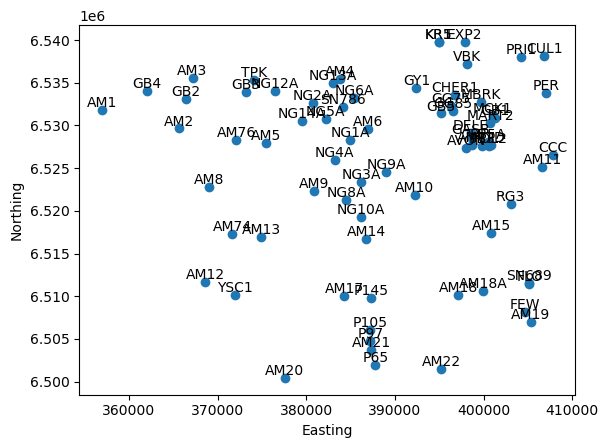

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

print(df.keys)

# Plan of data points
plt.scatter(df.Easting, df.Northing)
plt.xlabel('Easting')
plt.ylabel('Northing')
i = 0
for (xi, yi) in zip(df.Easting, df.Northing):
    plt.text(xi, yi, df.ID[i], va='bottom', ha='center')
    i += 1
#plt.plot([fx1, fx2], [fy1, fy2])
#plt.plot(fault_center[0], fault_center[1], 'o')
#plt.xlim(x0,x1)
#plt.ylim(y0,y1)

In [5]:
lithcodes = list(df.columns.values[3:])         # Make a list of formations  
df.Easting = pd.to_numeric(df.Easting)
df.Northing = pd.to_numeric(df.Northing)
df.Ground = pd.to_numeric(df.Ground)
print(lithcodes)

['Ground', 'TQ', 'Tr', 'Tkm', 'Tk', 'Tkc', 'Kcl', 'Kcp', 'Kcg', 'Kcm', 'Kcom', 'Kcok', 'Kcoh', 'Kwlp', 'Kwlw', 'Kwlm', 'Kws', 'Kwg', 'Kpc', 'Kps', 'Kpo', 'Jy', 'Jc']


In [6]:
strat = []
vdum = [38,
        -10,
        -52,
        -124,
        -320,
        -385,
        -435,
        -463,
        -472,
        -494,
        -549,
        -591,
        -619,
        -666,
        -822,
        -881,
        -963,
        -1043,
        -1818,
        -2090,
        -2148,
        -3148,
        -4148]

for i, lith in enumerate(lithcodes):
    index = i
    lithid = i-1
    val = vdum[i]
    sequence = strat_info.loc[strat_info['unit'] == lith, 'sequence'].item()
    R = strat_info.loc[strat_info['unit'] == lith, 'R'].item()/255
    G = strat_info.loc[strat_info['unit'] == lith, 'G'].item()/255
    B = strat_info.loc[strat_info['unit'] == lith, 'B'].item()/255
    strat.append([index, lithid, lith, sequence, val, [round(R,2),round(G,2),round(B,2)]])
strat = pd.DataFrame(strat)
strat.columns =['index','lithid','lithcode','sequences','vals','color']
strat

,index,lithid,lithcode,sequences,vals,color
0,0,-1,Ground,Quaternary,38,"[1.0, 1.0, 1.0]"
1,1,0,TQ,Quaternary,-10,"[1.0, 1.0, 0.0]"
2,2,1,Tr,Tertiary,-52,"[0.73, 0.6, 0.58]"
3,3,2,Tkm,Tertiary,-124,"[1.0, 0.6, 0.2]"
4,4,3,Tk,Tertiary,-320,"[1.12, 0.32, 0.16]"
5,5,4,Tkc,Tertiary,-385,"[1.0, 0.6, 0.2]"
6,6,5,Kcl,Coolyena,-435,"[0.67, 0.8, 0.0]"
7,7,6,Kcp,Coolyena,-463,"[0.77, 0.84, 0.61]"
8,8,7,Kcg,Coolyena,-472,"[0.67, 0.85, 0.6]"
9,9,8,Kcm,Coolyena,-494,"[0.67, 0.78, 0.71]"


### Make lithology table for Loop

In [114]:
#Okay, let me vocalise, or type, what is in my mind...
# So we treat the four parts as their own thing...
# then we make the unconformities feature names....
#Also, on the phone with JP, he said the last number is the end of hole (EOH) 


data_list = df.values.tolist()             # Turn data into a list of lists
formatted_data = []
for i in range(len(data_list)): #iterate for each row
    end = False
    # okay, first we will establish the max value (i.e. the end of the hole)
    stuff = []
    for j in range(3,25,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            stuff.append(data_list[i][j])
            
    EOH = max(stuff)
    print(EOH)
        
    boreid = data_list[i][2]
    easting, northing = data_list[i][0], data_list[i][1]
    groundlevel = data_list[i][3]    
    # First channp.nan, np.nan, np.nange - we can get the norms from the geophys data...
    gx, gy, gz =np.nan, np.nan,np.nan
        
    # Add data for groundlevel
    val = strat.vals[0]
    formatted_data.append([boreid, easting, northing, groundlevel, val, 'Ground', 'Quaternary', gx, gy, gz]) #eventually we cn get this from a dem...
    current_bottom = np.copy(groundlevel)
    
    #okay... lets see if the TQ boundary exists... 
    # JP question - Say in SN786, how you have logged it, do you mean the Pinjar is at the surface?
    #thought 2 - we will just have a DEM eventaully I imagine... so ground could be an unconformity if we have something other than TQ at the surface?
    # but in the current framework:
    if isinstance(data_list[i][4], numbers.Number) == True:
        bottom    = groundlevel - float(data_list[i][4])  # Ground surface - TQ (mbgl)
        val       = strat.vals[1]                      # designated isovalue
        lithid    = lithcodes[1]                       # lithology id 
        feat_name = strat.sequences[1]                 # sequence name
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])
        current_bottom = np.copy(bottom)
    
    # I know, I know, there isn't any of the tertiary one here, but in being thorough...
    
    for j in range(5,9,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue
                end = True
                                          
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)

                                   
    # Teriary unconformity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.
        lithid = 'Tert_base'
        feat_name = 'Tertiary_unconformity'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])
                                          
    # Fighting, out of the perth Basin by way of San Jose Calfornia: The Coolyeena Formation!!!!
    
    for j in range(9,16,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom)  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue     
                end = True
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)                                          
                                          
    # Unconfiormity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.  
        lithid = 'Cool_base'
        feat_name = 'CoolUC'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])     
                                          
    for j in range(16,21,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue     
                end = True
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)  
    # Unconfiormity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.
        lithid = 'Warn_base'
        feat_name = 'WarnUC'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])  
        
    gx, gy, gz = np.nan, np.nan, np.nan
    for j in range(21,26,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
                lithid    = lithcodes[j-3 ]                       # lithology id 
                feat_name = strat.sequences[j-3]                 # sequence name
                formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
                current_bottom = np.copy(bottom) 

#geophys data
#Thomas_Yaragadee base
X = np.loadtxt('../Geological_data/Geophysical_data/Thomas_transect/Yar_base_thomas.dat')
for i in range(len(X)):
    val = vdum[-2]
    feat_name = strat.sequences[21] 
    lithid    = lithcodes[21]
    formatted_data.append(['seis', X[i,0], X[i,1], X[i,2], val, lithid, feat_name, gx, gy, gz]) 

"""#Thomas Break up uncomformity 
X = np.loadtxt('../Geological_data/Geophysical_data/Thomas_transect/BU_thomas.dat')
for i in range(len(X)):
    val = 0.
    lithid = 'Warn_base'
    feat_name = 'WarnUC'
    formatted_data.append(['seis', X[i,0], X[i,1], X[i,2], val, lithid, feat_name, gx, gy, gz]) 

#Thomas Top_SPS
X = np.loadtxt('../Geological_data/Geophysical_data/Thomas_transect/Top_SPS_thomas.dat')
for i in range(len(X)):
    val = vdum[16]
    feat_name = strat.sequences[16] 
    lithid    = lithcodes[16]
    formatted_data.append(['seis', X[i,0], X[i,1], X[i,2], val, lithid, feat_name, gx, gy, gz])"""

data = pd.DataFrame(formatted_data)
data.columns =['ID','X','Y','Z','val','lithcode','feature_name', 'gx', 'gy', 'gz']


303
220
230.0
313
208.0
261
729
549
168
762
535
719
185.0
135
509
134
275
135.0
680
100.0
517
270
316
188
881
300
254
189
647
317
302
721
180
267
171
231
244
810
810
303
298
201
784
405
798
810
838
253
259
676
504
300
301
206
154
802
198
400
464
117
610
467
311
138
251
305
306
335
299
311
311
111
179
311


#### Fault stuff

In [115]:
#The Bado
fx1, fx2 = 373786, 373439
fy1, fy2 = 6528191,6517059
fz = -800 #[-200,-500]

fault_azimuth = 90 - np.rad2deg(np.arctan(np.abs(fy2-fy1)/np.abs(fx2-fx1)))
fault_center = [fx1 + (fx2 - fx1)/2, fy1 + (fy2 - fy1)/2, fz]
fault_max_disp =500. # 200? 
fault_slip_vector=[0,0,1]
major_axis = 100000#np.sqrt((fx2 - fx1)**2 + (fy2 - fy1)**2)/2 # fault_extent - along fault
minor_axis = 100000 # Fault_influence - orthogonal to fault
intermediate_axis = 0 # fault_vertical_radius
strike, dip = fault_azimuth, 270

# Make cloud of points along fault plane
nh = 50 # points  in x/y plane
x_array, y_array = [], [] # arrays to create points along fault
x_array.append(fx1)
y_array.append(fy1)
for i in range(nh-2):
    x_array.append(fx1 + (i+1) * (fx2-fx1)/(nh-1))
    y_array.append(fy1 + (i+1) * (fy2-fy1)/(nh-1))  
x_array.append(fx2)
y_array.append(fy2)

z_array = np.arange(-1000, 0, 50) 
nv = len(z_array) # points in z plane                                                                       

from LoopStructural.utils.helper import strike_dip_vector
nx, ny, nz = strike_dip_vector([strike], [dip])[0]
print(nx,ny,nz)

fault_plane_3d = []
for v in range(nv):# vertical points 
    for h in range(nh): # horizontal points
        x, y, z = x_array[h], y_array[h], z_array[v]
        fault_plane_3d.append((x,y,z))
        df_new_row = pd.DataFrame.from_records({'X':[x], 'Y':[y], 'Z':[z], 'val':[0.], 'feature_name':['Fault'], 'nx': [nx], 'ny': [ny], 'nz': [nz]})
        data = pd.concat([data, df_new_row], ignore_index = True)
        
## ADD FAULT (this chunk given to me directly by Lachlan Grose to make an ellipsoid fault)
from LoopStructural.modelling.features.fault._fault_function import CubicFunction, FaultDisplacement, Composite
hw = CubicFunction()
hw.add_cstr(0, 1)
hw.add_grad(0, 0)
hw.add_cstr(1, 0)
hw.add_grad(1, 0)
hw.add_max(1)
fw = CubicFunction()
fw.add_cstr(0, -1)
fw.add_grad(0, 0)
fw.add_cstr(-1, 0)
fw.add_grad(-1, 0)
fw.add_min(-1)
gyf = CubicFunction()
gyf.add_cstr(-1, 0)
gyf.add_cstr(1, 0)
gyf.add_cstr(-0.2, 1)
gyf.add_cstr(0.2, 1)
gyf.add_grad(0, 0)
gyf.add_min(-1)
gyf.add_max(1)
gzf = CubicFunction()
gzf.add_cstr(-1, 0)
gzf.add_cstr(1, 0)
gzf.add_cstr(-0.2, 1)
gzf.add_cstr(0.2, 1)
gzf.add_grad(0, 0)
gzf.add_min(-1)
gzf.add_max(1)
gxf = Composite(hw, fw)
fault_displacement = None
fault_displacement = FaultDisplacement(gx=gxf, gy=gyf, gz=gzf)
faultfunction = fault_displacement

-0.9995145257373308 0.031156264860838546 -1.8369701987210297e-16


In [116]:
for lith in lithcodes:
    filtered_df = data[data.lithcode == lith] 
    print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])

filtered_df = data[data.lithcode == 'Tert_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])
filtered_df = data[data.lithcode == 'Cool_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])
filtered_df = data[data.lithcode == 'Warn_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])


 Lithology =  Ground 

         ID         X          Y      Z   val lithcode feature_name  gx  gy  gz
0      KR1  394957.0  6539787.0  216.0  38.0   Ground   Quaternary NaN NaN NaN
4      KR5  394957.0  6539787.0  216.0  38.0   Ground   Quaternary NaN NaN NaN
14    EXP2  397865.0  6539765.0  230.0  38.0   Ground   Quaternary NaN NaN NaN
26    CUL1  406858.0  6538132.0  179.0  38.0   Ground   Quaternary NaN NaN NaN
36    PRI1  404259.0  6537999.0  208.0  38.0   Ground   Quaternary NaN NaN NaN
..     ...       ...        ...    ...   ...      ...          ...  ..  ..  ..
600   NG9A  389013.0  6524545.0  67.67  38.0   Ground   Quaternary NaN NaN NaN
605  NG10A  386171.0  6519336.0  66.47  38.0   Ground   Quaternary NaN NaN NaN
613  NG12A  376443.0  6534012.0  37.39  38.0   Ground   Quaternary NaN NaN NaN
618  NG13A  383023.0  6534943.0  50.23  38.0   Ground   Quaternary NaN NaN NaN
623  NG14A  379507.0  6530558.0  52.17  38.0   Ground   Quaternary NaN NaN NaN

[74 rows x 10 columns]

 L

In [117]:
fault_displacement

### Create Geomodel

In [118]:
from LoopStructural import GeologicalModel
origin  = (x0, y0, z0)
maximum = (x1, y1, z1)
geomodel = GeologicalModel(origin, maximum)
geomodel.data = data

### Add surfaces

In [119]:
Quat = geomodel.create_and_add_foliation("Quaternary",nelements=1e4)
#UC1 = geomodel.add_unconformity(geomodel["Quaternary"],-10)

Tert = geomodel.create_and_add_foliation("Tertiary",nelements=1e4)

TertUC = geomodel.create_and_add_foliation("Tertiary_unconformity",nelements=1e4)
#UC2 = geomodel.add_unconformity(geomodel["Tertiary_unconformity"],0)

Cool = geomodel.create_and_add_foliation("Coolyena",nelements=1e4)

CoolUC   = geomodel.create_and_add_foliation("CoolUC",nelements=1e4)
#UC3 = geomodel.add_unconformity(geomodel["CoolUC"],0)


Fault = geomodel.create_and_add_fault('Fault', 
                                      displacement = fault_max_disp,
                                      fault_slip_vector= fault_slip_vector,
                                      #fault_center = fault_center,
                                      minor_axis = minor_axis, # fault_influence
                                      major_axis = major_axis, # fault_extent
                                      #intermediate_axis = intermediate_axis, # fault_vertical_radius
                                      #aultfunction = faultfunction, #faultfunction in routines.ipynb
                                      #nelements=4000, steps=4, interpolatortype="FDI", buffer=0.3, solver='pyamg',
                                      force_mesh_geometry = False
                                      )




Warnbro = geomodel.create_and_add_foliation("Warnbro",nelements=1e4)



WarnUC = geomodel.create_and_add_foliation("WarnUC",nelements=1e4)
#UC4 = geomodel.add_unconformity(geomodel["WarnUC"],0)

"""Fault = geomodel.create_and_add_fault('Fault', 
                                      displacement = fault_max_disp,
                                      fault_slip_vector= fault_slip_vector,
                                      #fault_center = fault_center,
                                      minor_axis = minor_axis, # fault_influence
                                      #major_axis = major_axis, # fault_extent
                                      #intermediate_axis = intermediate_axis, # fault_vertical_radius
                                      #aultfunction = faultfunction, #faultfunction in routines.ipynb
                                      #nelements=4000, steps=4, interpolatortype="FDI", buffer=0.3, solver='pyamg',
                                      force_mesh_geometry = False
                                      )  """

#Yarragadee = geomodel.create_and_add_foliation("Yarragadee",nelements=1e4)




print(data.feature_name.unique())

Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
['Quaternary' 'Tertiary_unconformity' 'CoolUC' 'WarnUC' 'Coolyena'
 'Warnbro' 'Yarragadee' 'Tertiary' 'Fault']


C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\LoopStructural\modelling\features\builders\_fault_builder.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[mask, ["nx", "ny", "nz"]] /= np.linalg.norm(
C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\LoopStructural\modelling\features\builders\_fault_builder.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[mask, ["nx", "ny", "nz"]] /= minor_axis * 0.5
C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packa

### Add Stratigraphy Column

In [120]:
stratigraphic_column = {}
stratigraphic_column["Quaternary"] = {}
stratigraphic_column["Tertiary"] = {}
stratigraphic_column["Coolyena"] = {}
stratigraphic_column["Warnbro"] = {}
stratigraphic_column["Yarragadee"] = {}

for i in range(1,len(strat)-1,1):
    print(strat.sequences[i])
    stratigraphic_column[strat.sequences[i]][strat.lithcode[i]] = {'min' : strat.vals[i], 'max' : strat.vals[i-1], 'color' : strat.color[i]}

geomodel.set_stratigraphic_column(stratigraphic_column)
geomodel.update()

Quaternary
Tertiary
Tertiary
Tertiary
Tertiary
Coolyena
Coolyena
Coolyena
Coolyena
Coolyena
Coolyena
Coolyena
Warnbro
Warnbro
Warnbro
Warnbro
Warnbro
Yarragadee
Yarragadee
Yarragadee
Yarragadee


  0%|          | 0/10 [00:00<?, ?it/s]

In [121]:
from LoopStructural.visualisation import LavaVuModelViewer
viewer =  LavaVuModelViewer(geomodel)
viewer.add_model_surfaces(faults = False, cmap = 'Spectral')
#viewer.add_points(points = np.array(well_tops), name = 'fault')
viewer.set_zscale(zscale = 2)
viewer.interactive()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

In [107]:
stratigraphic_column

{'Quaternary': {'TQ': {'min': -10,
   'max': 38,
   'color': [1.0, 1.0, 0.0],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])}},
 'Tertiary': {'Tr': {'min': -52,
   'max': -10,
   'color': [0.73, 0.6, 0.58],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Tkm': {'min': -124,
   'max': -52,
   'color': [1.0, 0.6, 0.2],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Tk': {'min': -320,
   'max': -124,
   'color': [1.12, 0.32, 0.16],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Tkc': {'min': -385,
   'max': -320,
   'color': [1.0, 0.6, 0.2],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])}},
 'Coolyena': {'Kcl': {'min': -435,
   'max': -385,
   'color': [0.67, 0.8, 0.0],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Kcp': {'min': -463,
   'max': -435,
   'color': [0.77, 0.84, 0.61],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.

### 2D View

In [123]:
y_transects = [6505000, 6515000, 6525000, 6535000,]
delx, delz = 100, 100
x, z = np.linspace(x0,x1,delx), np.linspace(z0,z1,delz)
xx, zz = np.meshgrid(x,z)
V = []
for i in range(4):
    yy = np.zeros_like(xx)
    yy[:] = y_transects[i]
    #X_sect = geomodel.evaluate_model(np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
    vals1 = geomodel.evaluate_feature_value("Quaternary",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
    valsa = geomodel.evaluate_feature_value("Tertiary",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
    valsb = geomodel.evaluate_feature_value("Tertiary_unconformity",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
    vals2 = geomodel.evaluate_feature_value("Coolyena",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
    vals3 = geomodel.evaluate_feature_value("CoolUC",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
    vals4 = geomodel.evaluate_feature_value("Warnbro",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
    vals5 = geomodel.evaluate_feature_value("WarnUC",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
    vals6 = geomodel.evaluate_feature_value("Yarragadee",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))

    #plt.imshow(vals2)

    dum = np.ones_like(vals4)*-10000
    dum[vals5<0] = vals6[vals5<0]
    dum[vals5>0] = vals4[vals5>0]
    dum[vals3>0] = vals2[vals3>0]
    dum[valsb>0] = valsa[valsb>0]
    dum[vals1>-10] = vals1[vals1>-10]

    Lith = np.ones_like(dum)*-1
    for i in range(len(vdum)-2,-1,-1):
        Lith[dum>vdum[i]] = i
    V.append(Lith)


ERROR: 2024-04-04 21:51:48,341: geological_model.py:1871 -- Yarragadee does not exist!
ERROR: 2024-04-04 21:51:48,503: geological_model.py:1871 -- Yarragadee does not exist!
ERROR: 2024-04-04 21:51:48,671: geological_model.py:1871 -- Yarragadee does not exist!
ERROR: 2024-04-04 21:51:48,844: geological_model.py:1871 -- Yarragadee does not exist!


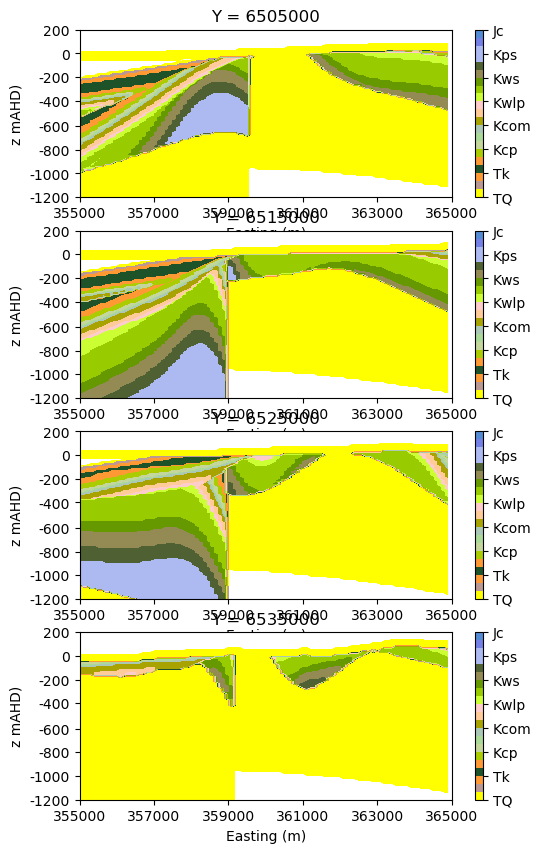

In [124]:
#plt.imshow(Lith,origin = 'lower')
plt.figure(figsize=(6,10))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.contourf(V[i],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
                colors = strat['color'][1:])
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(lithcodes[1:])
    plt.title("Y = "+ str(y_transects[i]))
    plt.xticks([0,20,40,60,80,100],[x0,x0+2000,x0+4000,x0+6000,x0 + 8000, x0 + 10000])
    plt.xlabel('Easting (m)')
    yticks  = []
    yvals = [-1200,-1000,-800,-600,-400,-200,0,200]
    for ydum in yvals:
        n = np.argmin(abs(ydum-z))
        yticks.append(n)
    plt.yticks(yticks,yvals)
    plt.ylabel('z mAHD)')